<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-ML/blob/main/ONE_IA_Atrasos_Voos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explorando os dados

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
url = 'https://raw.githubusercontent.com/mauricioaalmeida/ONE-ML/refs/heads/main/data/flights.csv'
dados = pd.read_csv(url)
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [6]:
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [7]:
dados.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


Os dados estão aparentemente limpos, sem valores nulos e com tipos coerentes, os valores parecem condizentes, a principio sem Outliers consideráveis

## Visualizações Gráficas dos dados

In [8]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
average_delay

,airline,delay
0,BZ,3.077595
1,MM,40.498007
2,YE,25.772248


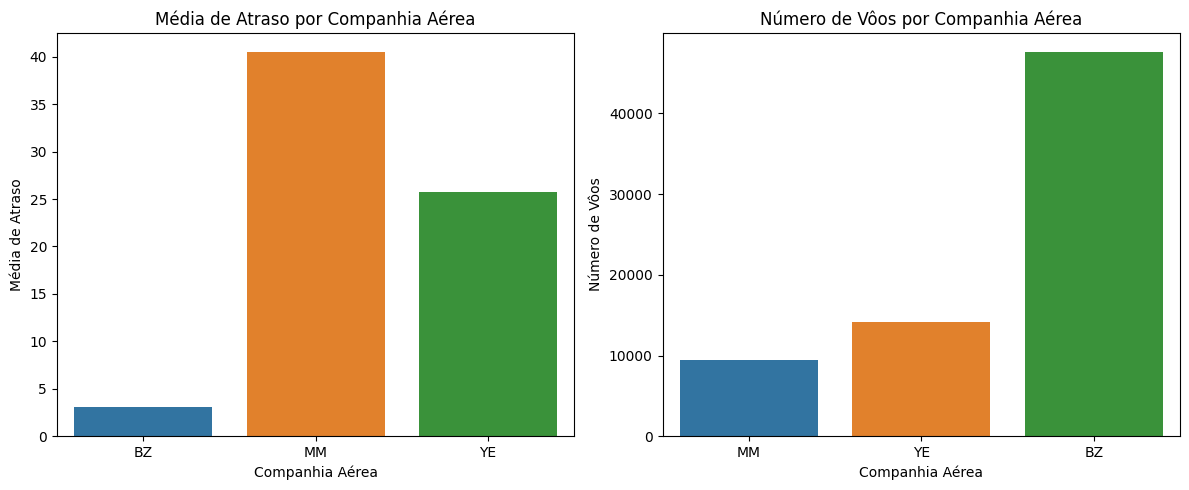

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x='airline', y='delay', data=average_delay, hue='airline', ax=axs[0])
axs[0].set_title('Média de Atraso por Companhia Aérea')
axs[0].set_xlabel('Companhia Aérea')
axs[0].set_ylabel('Média de Atraso')

sns.countplot(x='airline', data=dados, hue='airline', ax=axs[1])
axs[1].set_title('Número de Vôos por Companhia Aérea')
axs[1].set_xlabel('Companhia Aérea')
axs[1].set_ylabel('Número de Vôos')

plt.tight_layout()
plt.show()

In [10]:
def voos_atrasos(dados, col_filtro, col_obj):
  average_delay = dados.groupby(col_filtro)[col_obj].mean().reset_index()
  average_delay
  fig, axs = plt.subplots(1, 2, figsize=(12, 5))

  sns.barplot(x=col_filtro, y=col_obj, data=average_delay, hue=col_filtro, ax=axs[0])
  axs[0].set_title(f'Média de Atraso por {col_filtro}')
  axs[0].set_xlabel(col_filtro)
  axs[0].set_ylabel('Média de Atraso')

  sns.countplot(x=col_filtro, data=dados, hue='airline', ax=axs[1])
  axs[1].set_title(f'Número de Vôos por {col_filtro}')
  axs[1].set_xlabel(col_filtro)
  axs[1].set_ylabel('Número de Vôos')

  plt.tight_layout()
  return plt

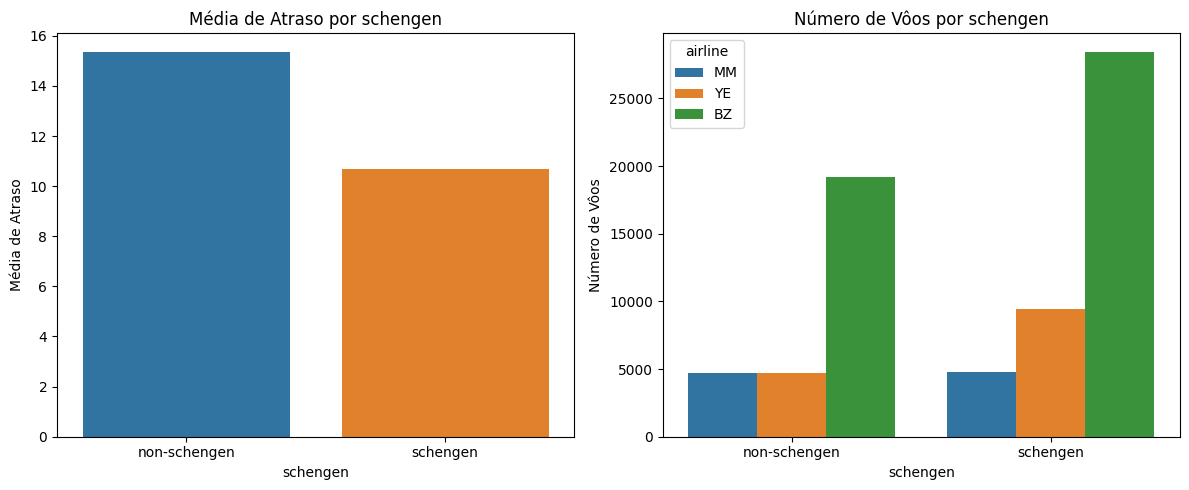

In [11]:
voos_atrasos(dados, 'schengen', 'delay').show()

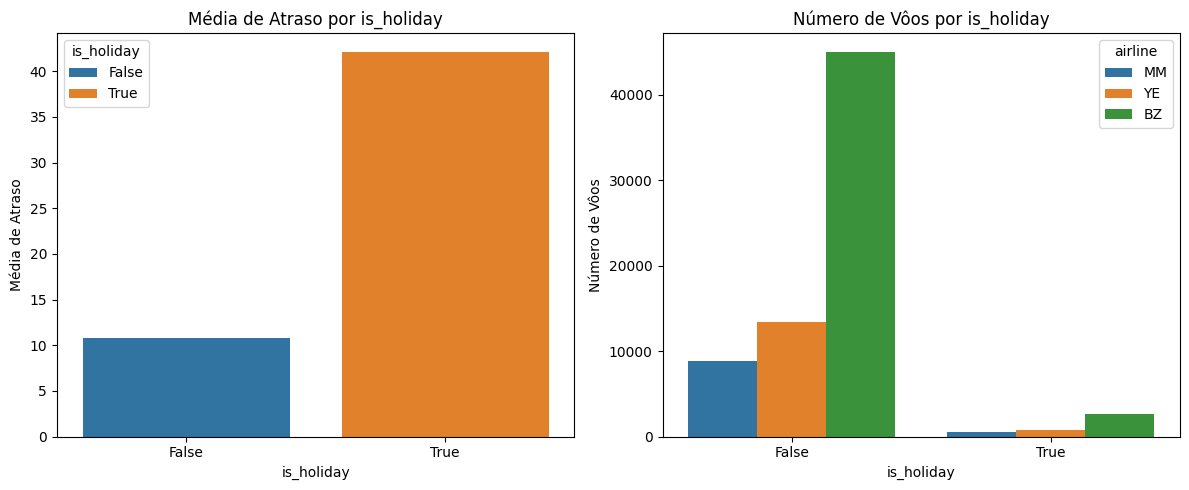

In [12]:
voos_atrasos(dados, 'is_holiday', 'delay').show()

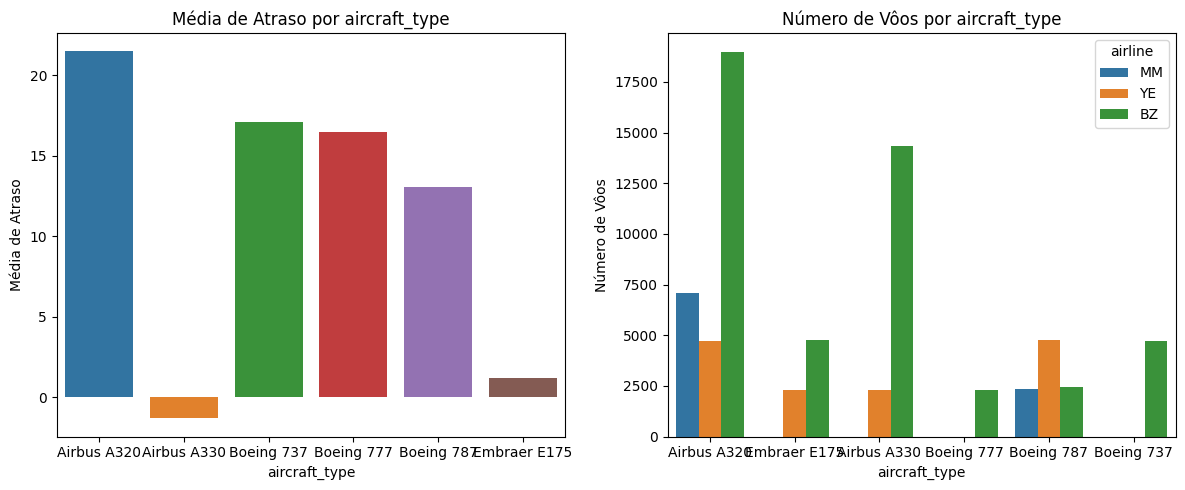

In [13]:
voos_atrasos(dados, 'aircraft_type', 'delay').show()

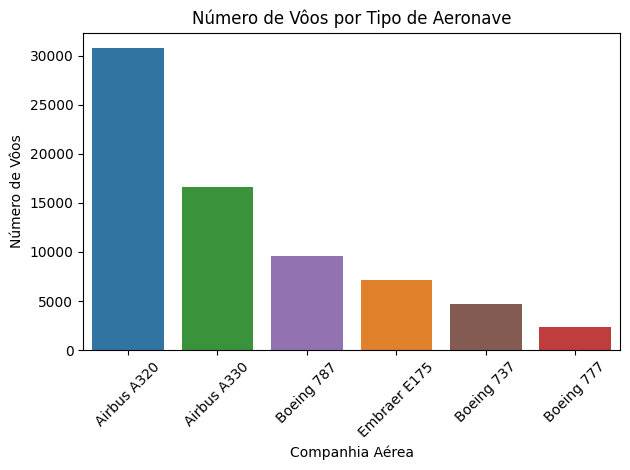

In [14]:
order = dados['aircraft_type'].value_counts().index

sns.countplot(x='aircraft_type', data=dados, hue='aircraft_type', order=order)
plt.title('Número de Vôos por Tipo de Aeronave')
plt.xlabel('Companhia Aérea')
plt.xticks(rotation=45)
plt.ylabel('Número de Vôos')

plt.tight_layout()
plt.show()

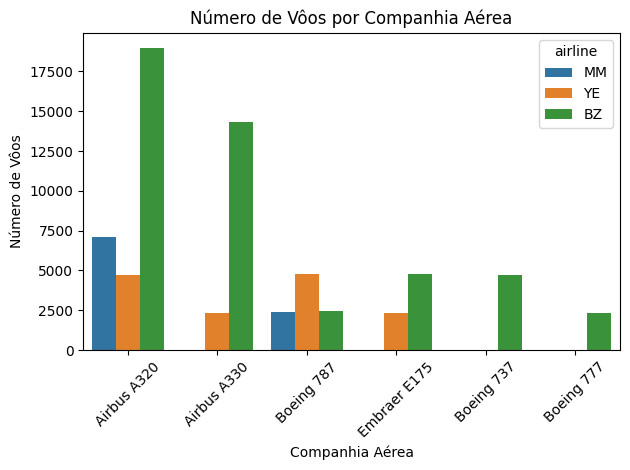

In [15]:
order = dados['aircraft_type'].value_counts().index

sns.countplot(x='aircraft_type', data=dados, hue='airline', order=order)
plt.title('Número de Vôos por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.xticks(rotation=45)
plt.ylabel('Número de Vôos')

plt.tight_layout()
plt.show()

## Analisando a distribuição dos dados

Text(0.5, 0, 'Hora de Chegada')

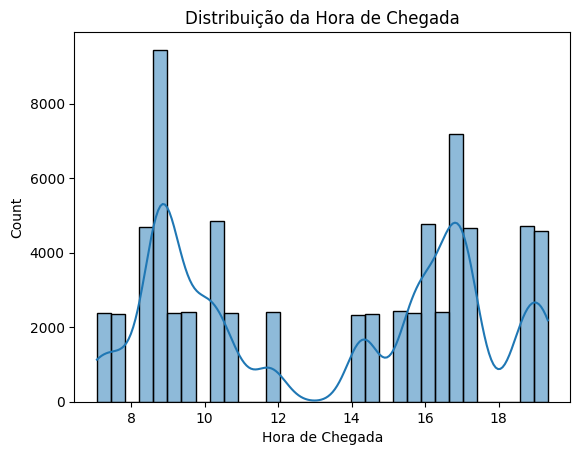

In [16]:
sns.histplot(data=dados, x='arrival_time', kde=True)
plt.title('Distribuição da Hora de Chegada')
plt.xlabel('Hora de Chegada')

Text(0.5, 0, 'Hora de Chegada')

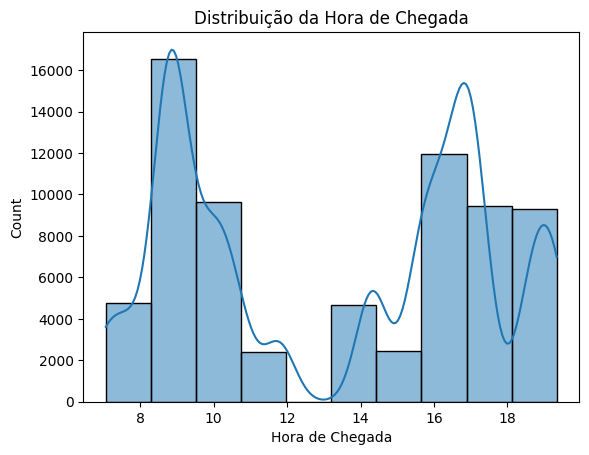

In [17]:
sns.histplot(data=dados, x='arrival_time', kde=True, bins=10)
plt.title('Distribuição da Hora de Chegada')
plt.xlabel('Hora de Chegada')

Text(0.5, 0, 'Hora de Chegada')

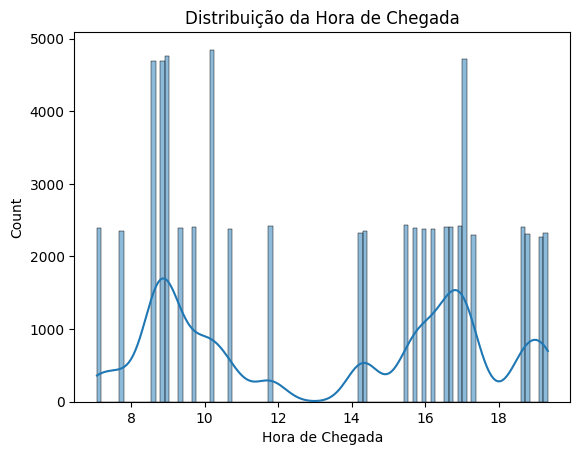

In [18]:
sns.histplot(data=dados, x='arrival_time', kde=True, bins=100)
plt.title('Distribuição da Hora de Chegada')
plt.xlabel('Hora de Chegada')



### **Freedman–Diaconis rule**

A regra de Freedman-Diaconis é um método para determinar a largura ideal dos bins (intervalos) em um histograma, buscando minimizar a diferença entre a distribuição empírica e a teórica. Ela utiliza o intervalo interquartil (IQR) para capturar a variabilidade dos dados e é robusta a outliers.
Como funciona:
A fórmula para calcular a largura do bin (Δ) pela regra de Freedman-Diaconis é:
Code

Δ = 2 * (Q75 - Q25) / N^(1/3)

Onde:

    Q75: é o 75º percentil (terceiro quartil) dos dados.
    Q25: é o 25º percentil (primeiro quartil) dos dados.
    N: é o número total de observações.

Por que usar?

    Robustez a outliers:
    O uso do IQR torna a regra menos sensível a valores extremos em comparação com outras regras que usam o desvio padrão, como a regra de Scott, segundo sites de pesquisa.
    Adequada para distribuições não normais:
    A regra de Freedman-Diaconis é uma boa opção quando se lida com dados que não seguem uma distribuição normal, informa a documentação da Astropy.

Facilidade de cálculo:
A fórmula é relativamente simples de calcular, mesmo com grandes conjuntos de dados.

Em resumo:
A regra de Freedman-Diaconis é uma ferramenta útil para a construção de histogramas, especialmente quando a robustez a outliers e a adequação a distribuições não normais são importantes

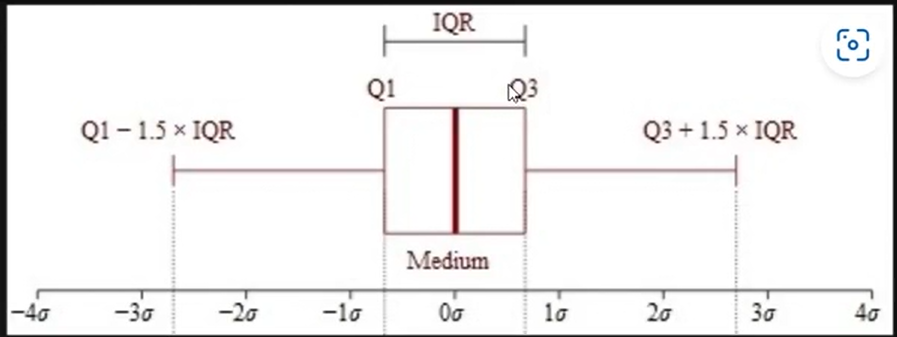

In [19]:
def calcular_fdr(df, col):
  Q75, Q25 = np.percentile(df[col], [75,25])
  IQR = Q75-Q25
  largura_bin = 2 * IQR * np.power(len(df[col]), -1/3)
  return largura_bin

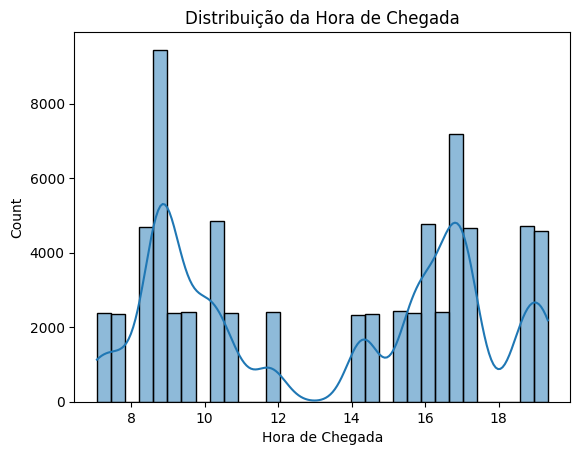

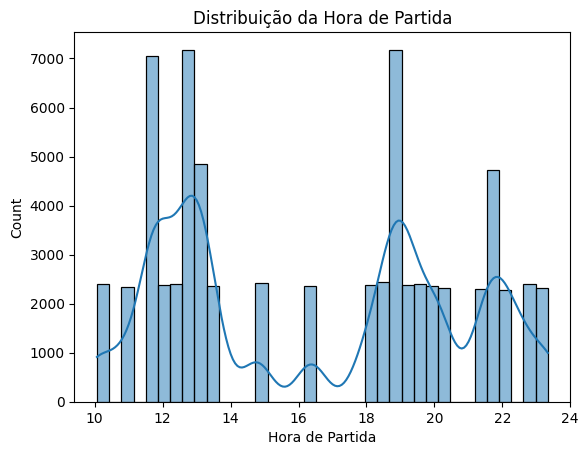

In [20]:
largura_bin = calcular_fdr(dados, 'arrival_time')
sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin)
plt.title('Distribuição da Hora de Chegada')
plt.xlabel('Hora de Chegada')
plt.show()
largura_bin = calcular_fdr(dados, 'departure_time')
sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin)
plt.title('Distribuição da Hora de Partida')
plt.xlabel('Hora de Partida')
plt.show()

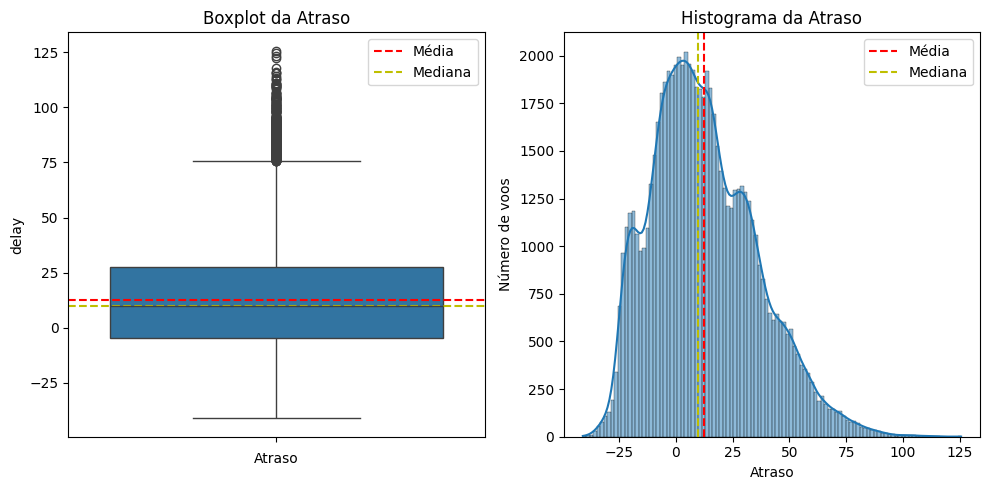

In [21]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()
std_delay = dados['delay'].std()
largura_bin = calcular_fdr(dados, 'delay')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot da Atraso')
axes[0].set_xlabel('Atraso')
axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].axhline(y=median_delay, color='y', linestyle='--', label='Mediana')
axes[0].legend()

sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin)
axes[1].set_title('Histograma da Atraso')
axes[1].set_xlabel('Atraso')
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()
plt.tight_layout()
plt.show()

Os dados estão consistentes e com uma boa distribuição, com leve assimetria à direita

## Feature engineering

In [22]:
dados.head(1)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981


In [23]:
dados['year'].astype(str)

,year
0,2010
1,2010
2,2010
3,2010
4,2010
...,...
71170,2022
71171,2022
71172,2022
71173,2022


In [24]:
dados['day'].astype(str)

,day
0,0
1,0
2,0
3,0
4,0
...,...
71170,364
71171,364
71172,364
71173,364


In [25]:
(dados['day']+1).astype(str)

,day
0,1
1,1
2,1
3,1
4,1
...,...
71170,365
71171,365
71172,365
71173,365


In [26]:
dados['year'].astype(str) + '-'+ (dados['day']+1).astype(str)

,0
0,2010-1
1,2010-1
2,2010-1
3,2010-1
4,2010-1
...,...
71170,2022-365
71171,2022-365
71172,2022-365
71173,2022-365


In [27]:
pd.to_datetime(dados['year'].astype(str) + '-'+ (dados['day']+1).astype(str), format='%Y-%j')


,0
0,2010-01-01
1,2010-01-01
2,2010-01-01
3,2010-01-01
4,2010-01-01
...,...
71170,2022-12-31
71171,2022-12-31
71172,2022-12-31
71173,2022-12-31


In [28]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-'+ (dados['day']+1).astype(str), format='%Y-%j')

In [29]:
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [30]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5,6])

In [31]:
dados['day_name'] = dados['date'].dt.day_name()

In [32]:
time = 8.885071
h = int(time)
m = int((time - h) * 60)
s = int((time - h) * 3600)/100
print(f"{h}:{m}:{s}")

8:53:31.86


In [33]:
dados['dt_arrival'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day']+1).astype(str) + ' ' +
                      dados['arrival_time'].astype(int).astype(str) + ':' + ((dados['arrival_time']-dados['arrival_time'].astype(int))*60).astype(int).astype(str)
                      + ':' + ((dados['arrival_time']-dados['arrival_time'].astype(int))*36).astype(int).astype(str)
                       , format='%Y-%j %H:%M:%S')

In [34]:
dados['dt_arrival'].dt.day_name()

,dt_arrival
0,Friday
1,Friday
2,Friday
3,Friday
4,Friday
...,...
71170,Saturday
71171,Saturday
71172,Saturday
71173,Saturday


In [35]:
def get_arrival_period(hour):
  if 5 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 14:
    return 'Lunchtime'
  elif 14 <= hour < 18:
    return 'Afternoon'
  elif 18 <= hour < 23:
    return 'Evening'
  else:
    return 'Night'

dados['arrival_period'] = dados['dt_arrival'].dt.hour.apply(get_arrival_period)
display(dados.head())

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name,dt_arrival,arrival_period
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday,2010-01-01 08:53:31,Morning
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday,2010-01-01 08:56:33,Morning
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday,2010-01-01 18:38:22,Evening
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday,2010-01-01 15:58:34,Afternoon
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday,2010-01-01 16:34:20,Afternoon


In [36]:
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name,dt_arrival,arrival_period
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday,2010-01-01 08:53:31,Morning
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday,2010-01-01 08:56:33,Morning
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday,2010-01-01 18:38:22,Evening
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday,2010-01-01 15:58:34,Afternoon
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday,2010-01-01 16:34:20,Afternoon


## Feature Enconding

In [37]:
dados.nunique()

,0
flight_id,30
airline,3
aircraft_type,6
schengen,2
origin,10
arrival_time,30
departure_time,30
day,365
year,13
is_holiday,2


In [38]:
dados['schengen'].unique()

array(['non-schengen', 'schengen'], dtype=object)

In [39]:
dados['is_holiday'].unique()

array([False,  True])

In [40]:
dados['is_weekend'].unique()

array([False,  True])

In [41]:
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0 , 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].replace({False: 0 , True: 1})
dados['is_weekend'] = dados['is_weekend'].replace({False: 0 , True: 1})

dados.head()

/tmp/ipython-input-4187639611.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['schengen'] = dados['schengen'].replace({'non-schengen': 0 , 'schengen': 1})
/tmp/ipython-input-4187639611.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['is_holiday'] = dados['is_holiday'].replace({False: 0 , True: 1})
/tmp/ipython-input-4187639611.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name,dt_arrival,arrival_period
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday,2010-01-01 08:53:31,Morning
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday,2010-01-01 08:56:33,Morning
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday,2010-01-01 18:38:22,Evening
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday,2010-01-01 15:58:34,Afternoon
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday,2010-01-01 16:34:20,Afternoon


In [42]:
col_alvo = 'delay'
col_id = 'flight_id'

colunas = dados.columns.tolist()
col_categoricas = dados.select_dtypes(include=['object']).columns.tolist()
col_numericas = dados.select_dtypes(include=['number']).columns.tolist()
col_numericas.remove(col_id)
#colunas.remove(col_alvo)
print (col_categoricas)
print (col_numericas)

['airline', 'aircraft_type', 'origin', 'day_name', 'arrival_period']
['schengen', 'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay', 'is_weekend']


In [43]:
col_cat = col_categoricas.copy()
col_cat.remove('arrival_period')

df_encoded = pd.get_dummies(data=dados, columns=col_cat, dtype=int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
dados['arrival_period'].unique()

array(['Morning', 'Evening', 'Afternoon'], dtype=object)

## Limpando os dados
Removendo colunas desnecessárias

In [45]:
dados[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [46]:
col_remover = ['flight_id','departure_time','day','year','date','dt_arrival']

# Com Get_Dummies
df_encoded = df_encoded.drop(columns=col_remover)
# Com OneHotEncoder e 'arrival_period'
dados_enc = dados.drop(columns=col_remover).copy()

### OneHotEncoder


Vou usar o método OneHotEncoder

https://www.alura.com.br/artigos/get-dummies-vs-onehotencoder-qual-metodo-escolher

In [47]:
one_hot = make_column_transformer((
    OneHotEncoder( handle_unknown= 'ignore'),#drop = 'if_binary'),
    col_categoricas),
    remainder='passthrough',
    sparse_threshold=0)

dados_enc = one_hot.fit_transform(dados_enc)

In [48]:
one_hot.get_feature_names_out()

array(['onehotencoder__airline_BZ', 'onehotencoder__airline_MM',
       'onehotencoder__airline_YE',
       'onehotencoder__aircraft_type_Airbus A320',
       'onehotencoder__aircraft_type_Airbus A330',
       'onehotencoder__aircraft_type_Boeing 737',
       'onehotencoder__aircraft_type_Boeing 777',
       'onehotencoder__aircraft_type_Boeing 787',
       'onehotencoder__aircraft_type_Embraer E175',
       'onehotencoder__origin_AUZ', 'onehotencoder__origin_CNU',
       'onehotencoder__origin_CSF', 'onehotencoder__origin_EMM',
       'onehotencoder__origin_FJB', 'onehotencoder__origin_MWL',
       'onehotencoder__origin_PUA', 'onehotencoder__origin_TCY',
       'onehotencoder__origin_TZF', 'onehotencoder__origin_ZQO',
       'onehotencoder__day_name_Friday', 'onehotencoder__day_name_Monday',
       'onehotencoder__day_name_Saturday',
       'onehotencoder__day_name_Sunday',
       'onehotencoder__day_name_Thursday',
       'onehotencoder__day_name_Tuesday',
       'onehotencoder__day

In [49]:
dados_enc = pd.DataFrame(dados_enc, columns=one_hot.get_feature_names_out()).copy()
dados_enc

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,onehotencoder__day_name_Tuesday,onehotencoder__day_name_Wednesday,onehotencoder__arrival_period_Afternoon,onehotencoder__arrival_period_Evening,onehotencoder__arrival_period_Morning,remainder__schengen,remainder__arrival_time,remainder__is_holiday,remainder__delay,remainder__is_weekend
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,8.885071,0.0,70.205981,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,8.939996,0.0,38.484609,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,18.635384,0.0,2.388305,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,15.967963,0.0,19.138491,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,16.571894,0.0,15.016271,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,18.635384,1.0,25.677277,1.0
71171,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,16.718722,1.0,52.624348,1.0
71172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,8.564949,1.0,56.167080,1.0
71173,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,9.344097,1.0,56.758844,1.0


In [50]:
df_encoded.columns

Index(['schengen', 'arrival_time', 'is_holiday', 'delay', 'is_weekend',
       'arrival_period', 'airline_BZ', 'airline_MM', 'airline_YE',
       'aircraft_type_Airbus A320', 'aircraft_type_Airbus A330',
       'aircraft_type_Boeing 737', 'aircraft_type_Boeing 777',
       'aircraft_type_Boeing 787', 'aircraft_type_Embraer E175', 'origin_AUZ',
       'origin_CNU', 'origin_CSF', 'origin_EMM', 'origin_FJB', 'origin_MWL',
       'origin_PUA', 'origin_TCY', 'origin_TZF', 'origin_ZQO',
       'day_name_Friday', 'day_name_Monday', 'day_name_Saturday',
       'day_name_Sunday', 'day_name_Thursday', 'day_name_Tuesday',
       'day_name_Wednesday'],
      dtype='object')

In [51]:

dados_enc.columns

Index(['onehotencoder__airline_BZ', 'onehotencoder__airline_MM',
       'onehotencoder__airline_YE', 'onehotencoder__aircraft_type_Airbus A320',
       'onehotencoder__aircraft_type_Airbus A330',
       'onehotencoder__aircraft_type_Boeing 737',
       'onehotencoder__aircraft_type_Boeing 777',
       'onehotencoder__aircraft_type_Boeing 787',
       'onehotencoder__aircraft_type_Embraer E175',
       'onehotencoder__origin_AUZ', 'onehotencoder__origin_CNU',
       'onehotencoder__origin_CSF', 'onehotencoder__origin_EMM',
       'onehotencoder__origin_FJB', 'onehotencoder__origin_MWL',
       'onehotencoder__origin_PUA', 'onehotencoder__origin_TCY',
       'onehotencoder__origin_TZF', 'onehotencoder__origin_ZQO',
       'onehotencoder__day_name_Friday', 'onehotencoder__day_name_Monday',
       'onehotencoder__day_name_Saturday', 'onehotencoder__day_name_Sunday',
       'onehotencoder__day_name_Thursday', 'onehotencoder__day_name_Tuesday',
       'onehotencoder__day_name_Wednesday',
   

## Split

In [52]:
X = df_encoded.drop(columns=[col_alvo,'arrival_period'], axis=1)
y = df_encoded[col_alvo]

print(X.shape)
print(y.shape)

(71175, 30)
(71175,)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#

## Linha de Base - DummyRegressor

In [54]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train)


DummyRegressor()

In [55]:
dummy_regr.score(X_test, y_test)

-1.1633024256108015e-05

In [56]:
y_pred_dummy = dummy_regr.predict(X_test)

### Função

In [57]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calcular_metricas_regressao(y_test, y_pred):

    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

def calcular_metricas_regressao2(y_test, y_pred):
  rmse = root_mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  return rmse, mae, r2
#
def print_metricas_regressao(rmse, mae, r2):
  print(f'Raiz do Erro Quadrático Médio - RMSE: {rmse:.4f}')
  print(f'Erro Absoluto Médio - MAE: {mae:.4f}')
  print(f'R2 Score : {r2:.4f}')

## Avaliação DummyRegressor

In [58]:
print_metricas_regressao(*calcular_metricas_regressao2(y_test, y_pred_dummy))

Raiz do Erro Quadrático Médio - RMSE: 23.2241
Erro Absoluto Médio - MAE: 18.6127
R2 Score : -0.0000


# TEXTO: Métricas mais utilizadas

### Métricas mais utilizadas e suas traduções em português:

    Mean squared error - MSE (Erro Quadrático Médio);
    Mean absolute error - MAE (Erro Absoluto Médio);
    Root Mean Squared Error - RMSE (Raiz Quadrada do Erro Quadrático Médio);
    Mean Squared Logarithmic Error - MSLE (Erro Logarítmico Quadrático Médio); e
    Mean Absolute Percentage Error - MAPE (Percentual do Erro Absoluto Médio).


---


## Mean squared error - MSE (Erro Quadrático Médio):



### Mean squared error - MSE

O Mean Squared Error (MSE), ou Erro Quadrático Médio, é uma métrica amplamente utilizada para avaliar a performance de um modelo de aprendizado de máquina. Essa métrica calcula a média dos erros quadrados, onde cada erro é a diferença entre o valor previsto pelo modelo e o valor real. A elevação ao quadrado dá maior peso aos erros maiores, o que pode ser útil quando esses erros são particularmente indesejáveis. O MSE é definido matematicamente como:

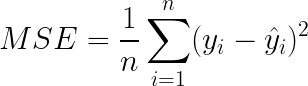

A imagem é de uma equação para erro quadrático médio (MSE), escrita em um fundo branco. A equação é: MSE = 1/n * Σ(de i=1 a n) ((yi - ŷi)²). Aqui, 'n' denota o número de amostras, 'yi' representa os valores reais, 'ŷi' é o valor previsto e o símbolo Sigma 'Σ' indica a soma de 'i = 1' a 'n' do quadrado diferenças entre os valores reais e previstos.

Nesta fórmula, "n" representa o número de observações ou amostras, "y_i" é o valor real da i-ésima observação e "ŷ_i" é o valor predito para a i-ésima observação. O MSE é calculado tomando a diferença entre os valores reais e os valores preditos, elevando ao quadrado, somando todas essas diferenças ao quadrado e, em seguida, dividindo pelo número de observações "n".

Para avaliar a qualidade de um modelo usando o MSE, quanto mais próximo de 0 for o valor do MSE, melhor o modelo está em prever os valores desejados. Isso ocorre porque um MSE de 0 indica que não há diferença entre os valores previstos e os valores reais, ou seja, o modelo está fazendo previsões perfeitas.

Embora o MSE seja uma métrica útil, vale a pena mencionar que ele tem a desvantagem de dar mais peso aos outliers devido ao quadrado de cada termo. Isso pode ser indesejável em muitos casos, levando os pesquisadores a usar alternativas, como o erro absoluto médio (MAE).

A documentação do scikit-learn possui informações que oferecem mais alguns detalhes a respeito dessa métrica em “mean_squared_error”.

---

## Mean absolute error - MAE (Erro Absoluto Médio):

### Mean absolute error - MAE

O Erro Absoluto Médio (MAE) é uma medida de erro comum utilizada em modelos de regressão. Ela é calculada tomando a média dos valores absolutos dos erros. Em outras palavras, para cada ponto de dados, nós primeiro calculamos o erro (a diferença entre o valor predito e o valor real), tomamos o valor absoluto desse erro (para garantir que todos os erros sejam positivos), e então calculamos a média de todos esses erros absolutos. O MAE é definido como:

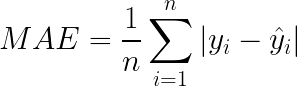

A imagem exibe uma equação matemática para o erro médio absoluto (MAE) escrita em texto preto sobre um fundo branco. A equação é denotada como "MAE = 1 dividido por n vezes Σ(yi - ŷi)". Nesta equação, "Σ" representa a soma de todos os valores de 1 a "n", onde "n" é o número total de amostras, "yi" simboliza o valor real dos dados e "ŷi" representa o valor previsto. valor.

Nesta equação, "n" representa o número de observações ou amostras, "y_i" é o valor real da i-ésima observação e "ŷ_i" é o valor predito para a i-ésima observação. O MAE é calculado tomando a diferença absoluta entre os valores reais e os valores preditos para todas as observações, somando essas diferenças absolutas e, em seguida, dividindo pelo número de observações "n".

A MAE é semelhante à Métrica do Erro Quadrático Médio (MSE), mas ao invés de elevar os erros ao quadrado, ela simplesmente toma o valor absoluto dos erros. Isso faz com que a MAE seja menos sensível a outliers do que a MSE, pois erros grandes não são amplificados pelo quadrado.

Ao avaliar modelos de regressão com a MAE, um valor menor indica um modelo mais preciso. Em outras palavras, quanto menor o MAE, melhor o modelo é em prever o valor correto para novos dados. A MAE possui um limite inferior de 0, que indica um modelo perfeito (ou seja, todas as previsões são exatas).

Vale ressaltar que, embora a MAE seja uma métrica útil, ela não deve ser a única métrica utilizada para avaliar a performance de um modelo de regressão. Outras métricas, como o MSE, a Raiz Quadrada do Erro Quadrático Médio (RMSE), e o Coeficiente de Determinação (R2), também devem ser consideradas para obter uma avaliação completa da capacidade de um modelo de fazer previsões precisas.

A documentação do scikit-learn oferece mais detalhes sobre essa métrica em “MAE”.

---


## Root Mean Squared Error - RMSE (Raiz Quadrada do Erro Quadrático Médio):

### Root Mean Squared Error - RMSE

A Raiz Quadrada do Erro Quadrático Médio (RMSE) é uma métrica de avaliação comumente usada em modelos de regressão, que é essencialmente a raiz quadrada do MSE (Erro Quadrático Médio). O RMSE é calculado tirando a raiz quadrada da média dos erros quadráticos, que são as diferenças entre os valores previstos e os valores reais, elevadas ao quadrado. Matematicamente o RMSE é definido como:


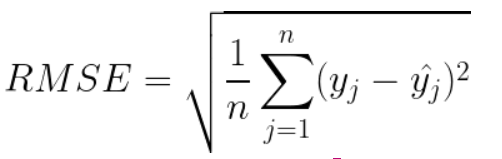


alt text: Fórmula: RMSE igual à raiz quadrada de 1 sobre n multiplicado pelo somatório de j indo de 1 a n do quadrado de y_j menos y_j chapéu

Onde:

    n é o número de amostras;
    Ŷ_j é a previsão do modelo para a amostra j;
    Y_j é a valor real para amostra j.

O RMSE é uma medida da dispersão dos resíduos (erros de previsão) e, assim como o MSE, penaliza erros maiores de forma mais severa que erros menores, devido ao fato de elevar ao quadrado as diferenças. Isso o torna particularmente sensível a grandes erros.

Um valor menor de RMSE indica um ajuste melhor do modelo aos dados, ou seja, as previsões do modelo estão mais próximas dos valores reais. É importante ressaltar que, embora o RMSE seja uma métrica útil, ele não deve ser a única métrica considerada ao avaliar a qualidade de um modelo de regressão.

Você pode acessar a documentação do scikit-learn para saber mais sobre essa métrica: metrics.mean_squared_error .




---



## Mean Squared Logarithmic Error - MSLE (Erro Logarítmico Quadrático Médio):

### Mean Squared Logarithmic Error - MSLE

O Erro Logarítmico Quadrático Médio é uma métrica de avaliação usada em problemas de previsão onde a escala dos valores alvo ou das previsões varia significativamente e os erros relativos são mais importantes do que os erros absolutos. O MSLE mede o erro médio quadrático entre os logaritmos naturais dos valores reais e os logaritmos naturais das previsões. Matematicamente pode-se definir MSLE da seguinte forma:

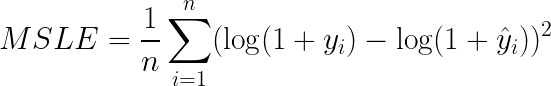

A imagem mostra uma fórmula matemática, especificamente para o Erro Logarítmico Quadrático Médio (MSLE), escrita em preto sobre fundo branco. A equação diz: "MSLE = ∑ (log(1+ yi) - log(1+ŷi))" com a soma ("∑") variando de "i=1" a "n".

Onde o "n" representa o número de observações ou amostras, "y_i" é o valor real da i-ésima observação e "ŷ_i" é o valor previsto para a i-ésima observação. O MSLE é calculado tomando o logaritmo natural dos valores reais e previstos somados a 1, calculando a diferença entre esses logaritmos, elevando ao quadrado, somando todas essas diferenças ao quadrado e, em seguida, dividindo pelo número de observações "n".

O principal ponto de foco dessa métrica é medir a diferença relativa entre os valores esperados e os preditos pelo modelo, ou seja, verifica a diferença percentual entre eles. De modo que, pequenas diferenças entre valores pequenos são tratados igualmente a grandes diferenças entre valores grandes, diferentemente do que acontece no MSE, como mostrado no exemplo:

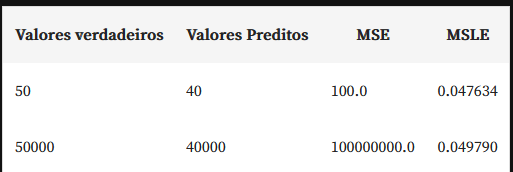

Valores verdadeiros	Valores Preditos	MSE	MSLE
50	40	100.0	0.047634
50000	40000	100000000.0	0.049790

Isso nos mostra que as grandes diferenças entre os valores reais e preditos tem pouca variação no resultado final da métrica. Portanto, essa métrica é mais utilizada quando não desejamos que grandes erros sejam significativamente mais penalizados que erros pequenos.

Para saber mais sobre essa métrica e como utilizá-la você pode acessar a documentação do scikit-learn: metrics.mean_squared_log_error.


---



## Mean Absolute Percentage Error - MAPE (Percentual do Erro Absoluto Médio):

### Mean Absolute Percentage Error - MAPE

O Mean Absolute Percentage Error é bem similar ao Mean Absolute Error - MAE, com a diferença de que ele mede a precisão como uma porcentagem e pode ser calculado como a porcentagem do MAE para cada amostra. O MAPE é muito utilizado em problemas de regressão pois traz uma interpretação bem intuitiva quanto ao erro relativo. A definição do MAPE é:

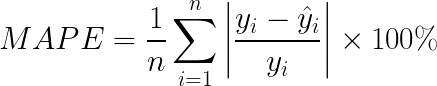


A imagem apresenta uma fórmula matemática escrita em preto sobre fundo branco. Esta fórmula calcula o erro percentual médio absoluto (MAPE). A fórmula é a seguinte: "MAPE = 1/n * Σ(yi - ŷi) x 100%", onde "yi" representa o valor real e ŷi o valor previsto. O resultado geral é então multiplicado por 100% para produzir o erro percentual.

Onde, "n" representa o número de observações ou amostras, "y_i" é o valor real da i-ésima observação, "ŷ_i" é o valor previsto para a i-ésima observação, e o MAPE é calculado como a média das porcentagens absolutas das diferenças entre os valores reais e os valores previstos em relação aos valores reais. O resultado é multiplicado por 100% para expressar o erro como uma porcentagem.

O MAPE é frequentemente usado como uma métrica de erro para avaliar a precisão das previsões em problemas de previsão e é expresso como uma porcentagem do erro médio absoluto em relação aos valores reais. Para saber mais sobre essa métrica e como utilizá-la você pode acessar a documentação do scikit-learn: metrics.mean_absolute_percentage_error.

Se desejar saber mais sobre essas métricas, você pode ler o artigo Métricas de avaliação para séries temporais.

# Dummy strategy test

In [59]:
estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)
    print(f'Estratégias: {estrategia}')
    print_metricas_regressao(*calcular_metricas_regressao2(y_test, y_pred_dummy))
    print('---')

Estratégias: mean
Raiz do Erro Quadrático Médio - RMSE: 23.2241
Erro Absoluto Médio - MAE: 18.6127
R2 Score : -0.0000
---
Estratégias: median
Raiz do Erro Quadrático Médio - RMSE: 23.4038
Erro Absoluto Médio - MAE: 18.4891
R2 Score : -0.0155
---
Estratégias: quantile
Raiz do Erro Quadrático Médio - RMSE: 28.7943
Erro Absoluto Médio - MAE: 22.0382
R2 Score : -0.5372
---
Estratégias: constant
Raiz do Erro Quadrático Médio - RMSE: 23.3699
Erro Absoluto Médio - MAE: 18.4893
R2 Score : -0.0126
---


# Random Forest Regressor

In [60]:
X_train.columns

Index(['schengen', 'arrival_time', 'is_holiday', 'is_weekend', 'airline_BZ',
       'airline_MM', 'airline_YE', 'aircraft_type_Airbus A320',
       'aircraft_type_Airbus A330', 'aircraft_type_Boeing 737',
       'aircraft_type_Boeing 777', 'aircraft_type_Boeing 787',
       'aircraft_type_Embraer E175', 'origin_AUZ', 'origin_CNU', 'origin_CSF',
       'origin_EMM', 'origin_FJB', 'origin_MWL', 'origin_PUA', 'origin_TCY',
       'origin_TZF', 'origin_ZQO', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday'],
      dtype='object')

In [61]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print_metricas_regressao(*calcular_metricas_regressao2(y_test, y_pred_rf))

Raiz do Erro Quadrático Médio - RMSE: 13.7301
Erro Absoluto Médio - MAE: 11.0138
R2 Score : 0.6505


## YellowBrick

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


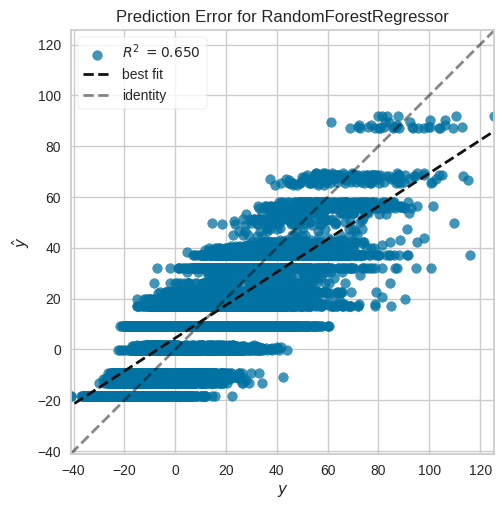

In [62]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


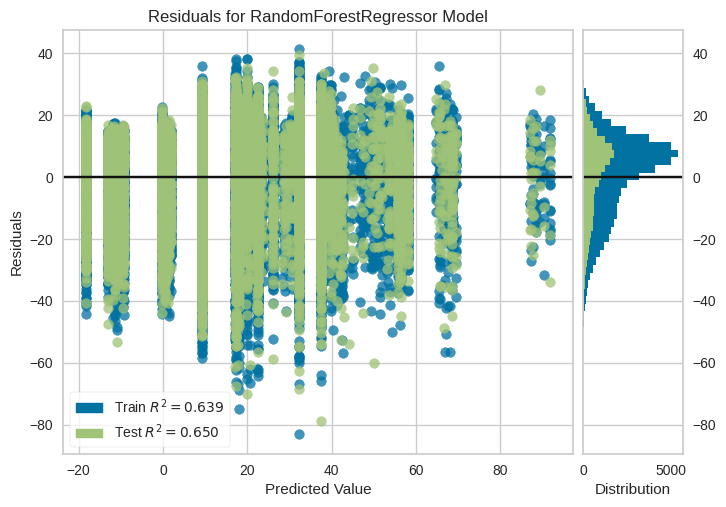

In [63]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)


### Testando um modelo com a feature arrival_period

In [64]:
# Get feature names from the one_hot transformer
feature_names = one_hot.get_feature_names_out()

# Create DataFrame from transformed data with feature names
dados_enc_df = pd.DataFrame(dados_enc, columns=feature_names)
dados_enc_df = dados_enc_df.drop(columns=['remainder__arrival_time'], axis=1)
X2 = dados_enc_df.drop(columns=['remainder__'+col_alvo], axis=1)
y2 = dados_enc_df['remainder__'+col_alvo]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)
print(X2.shape)
print(y2.shape)

model_rf2 = RandomForestRegressor(max_depth=5, random_state=42)
model_rf2.fit(X2_train, y2_train)
y2_pred_rf = model_rf2.predict(X2_test)
print_metricas_regressao(*calcular_metricas_regressao2(y2_test, y2_pred_rf))

(71175, 32)
(71175,)
Raiz do Erro Quadrático Médio - RMSE: 13.7185
Erro Absoluto Médio - MAE: 11.0071
R2 Score : 0.6511


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


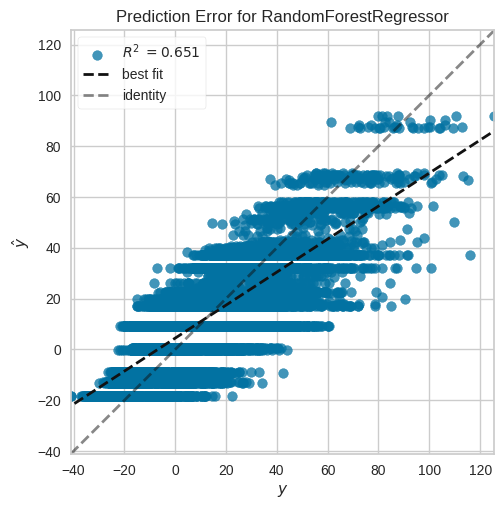

<Figure size 800x550 with 0 Axes>

In [65]:
visualizer = prediction_error(model_rf2, X2_train, y2_train, X2_test, y2_test)
visualizer.ax.set_title('Prediction Error for RandomForestRegressor Model')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


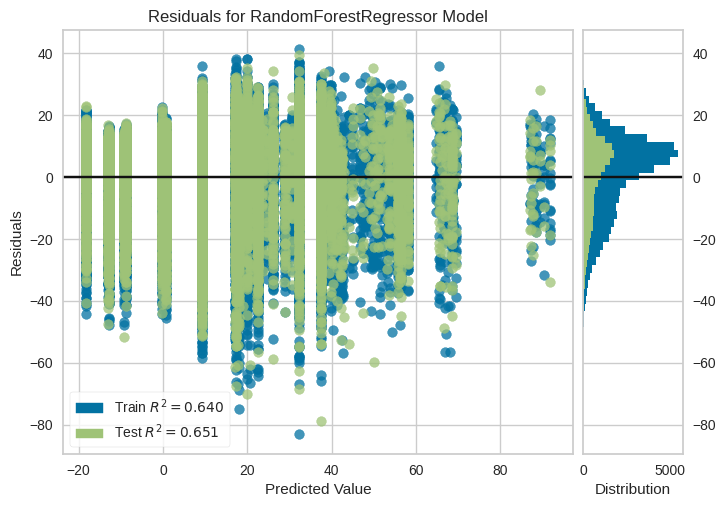

<Figure size 800x550 with 0 Axes>

In [66]:

viz = residuals_plot(model_rf2, X2_train, y2_train, X2_test, y2_test)
viz.ax.set_title('Residuals for RandomForestRegressor Model')
plt.tight_layout()
plt.show()

# Cross-Validation - Validação Cruzada

In [67]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'MAE': 'neg_mean_absolute_error',
    'RMSE': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)
cv_results

{'fit_time': array([5.39101195, 3.70112395, 3.40087962, 3.42681766, 4.53325796]),
 'score_time': array([0.09408164, 0.06220388, 0.06173873, 0.06400061, 0.0613358 ]),
 'test_MAE': array([-11.07421449, -11.30328674, -11.05630068, -11.14454886,
        -11.17423931]),
 'test_RMSE': array([-13.76668658, -14.04881475, -13.79310018, -13.87672957,
        -13.9303929 ]),
 'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

In [68]:
for metric in scoring.keys():
  scores = cv_results[f'test_{metric}']
  mean_score = "{:.3f}".format(scores.mean())
  std_score = "{:.3f}".format(scores.std())

  print(f"{metric.upper()}: Scores: {[f'{val:.3f}' for val in scores]}")
  print(f'{metric.upper()}: Mean: {mean_score}, Std: {std_score}')
  print('---------------------------------------------------------------------')

MAE: Scores: ['-11.074', '-11.303', '-11.056', '-11.145', '-11.174']
MAE: Mean: -11.151, Std: 0.088
---------------------------------------------------------------------
RMSE: Scores: ['-13.767', '-14.049', '-13.793', '-13.877', '-13.930']
RMSE: Mean: -13.883, Std: 0.101
---------------------------------------------------------------------
R2: Scores: ['0.647', '0.624', '0.645', '0.641', '0.635']
R2: Mean: 0.638, Std: 0.008
---------------------------------------------------------------------


OBS: Não houveram diferenças significativas, indicando que o modelo está ok, e o dataset não precisa de validação cruzada (desvio padrão baixo e valores próximos ao encontrados anteriormente)


#Feature Engineer - Seleção de recursos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


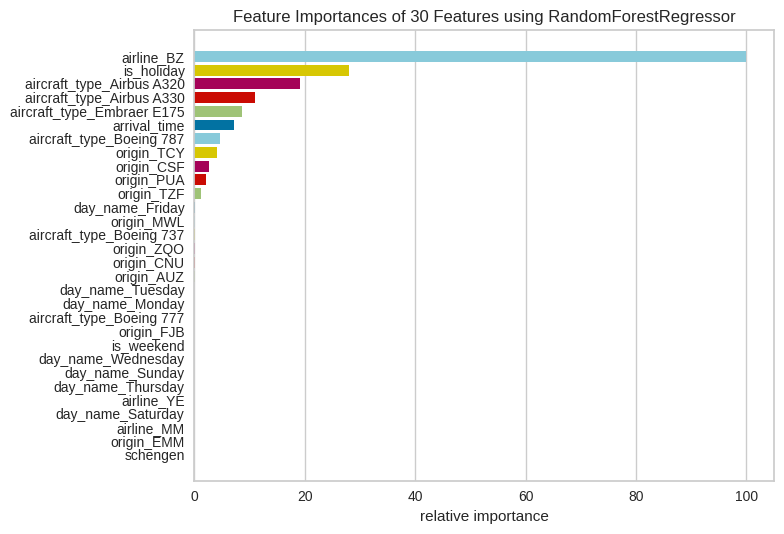

<Axes: title={'center': 'Feature Importances of 30 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [69]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf)
viz.fit(X_train, y_train)
viz.show()
#

Não mostrar a importância relativa e apenas as mais importantes

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


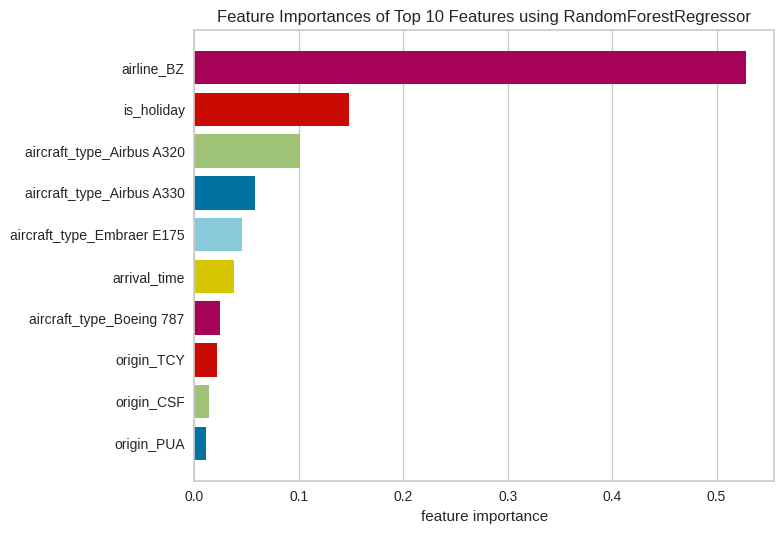

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [70]:
viz = FeatureImportances(model_rf, relative=False, topn=10)
viz.fit(X_train, y_train)
viz.show()


In [71]:
model_rf.feature_importances_

array([1.31626589e-06, 3.76138301e-02, 1.47833079e-01, 5.49650545e-05,
       5.28603645e-01, 1.60841898e-05, 2.48182752e-05, 1.00718794e-01,
       5.82214910e-02, 4.69919215e-04, 8.35839732e-05, 2.46628788e-02,
       4.56185393e-02, 1.65605360e-04, 1.91475449e-04, 1.39789803e-02,
       1.24159939e-05, 6.24380717e-05, 7.07424055e-04, 1.13850156e-02,
       2.21200449e-02, 5.97040341e-03, 2.34582771e-04, 8.54699803e-04,
       1.13652488e-04, 2.25460487e-05, 4.18885809e-05, 3.28751328e-05,
       1.29406516e-04, 5.36014573e-05])

In [72]:
importances = model_rf.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances

,feature,importance
4,airline_BZ,0.528604
2,is_holiday,0.147833
7,aircraft_type_Airbus A320,0.100719
8,aircraft_type_Airbus A330,0.058221
12,aircraft_type_Embraer E175,0.045619
1,arrival_time,0.037614
11,aircraft_type_Boeing 787,0.024663
20,origin_TCY,0.022120
15,origin_CSF,0.013979
19,origin_PUA,0.011385


In [73]:
results_df = pd.DataFrame(index=['MAE', 'RMSE', 'r2'])

model_selected_features = RandomForestRegressor(max_depth=5, random_state=42)

for count in [1, 5, 10, 15, 20, 20, 25, 30]:
  selected_features = feature_importances['feature'].values[:count]

  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  model_selected_features.fit(X_train_selected, y_train)
  y_pred_selected = model_selected_features.predict(X_test_selected)
  metricas = calcular_metricas_regressao(y_test, y_pred_selected)
  results_df[f'top_{count}'] = list(metricas.values())

results_df


,top_1,top_5,top_10,top_15,top_20,top_25,top_30
MAE,18.8639,15.1651,13.7426,13.7335,13.7307,13.7307,13.7301
RMSE,14.9854,12.0714,11.0282,11.0164,11.0137,11.0142,11.0138
r2,0.3402,0.5736,0.6498,0.6503,0.6504,0.6504,0.6505


In [74]:
results_df = pd.DataFrame(index=['MAE', 'RMSE', 'r2'])

model_selected_features = RandomForestRegressor(max_depth=5, random_state=42)

for count in range(10,16):
  selected_features = feature_importances['feature'].values[:count]

  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  model_selected_features.fit(X_train_selected, y_train)
  y_pred_selected = model_selected_features.predict(X_test_selected)
  metricas = calcular_metricas_regressao(y_test, y_pred_selected)
  results_df[f'top_{count}'] = list(metricas.values())

results_df

,top_10,top_11,top_12,top_13,top_14,top_15
MAE,13.7426,13.7378,13.7344,13.7348,13.7335,13.7335
RMSE,11.0282,11.0258,11.0173,11.0177,11.0164,11.0164
r2,0.6498,0.6501,0.6503,0.6502,0.6503,0.6503


OBS: Até 12 Features há uma variação significativa, porém após 13 o resultado permanece praticamente constante, portanto vamos treinar o modelo apenas com 12

In [75]:
selected_features = feature_importances['feature'].values[:12]

X_selected_features = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)


# TEXTO: RandomForestRegressor - Parametros



O RandomForestRegressor é um modelo de conjunto que combina várias árvores de decisão para fazer previsões mais robustas e precisas por meio da técnica de Bagging. Para conferir mais detalhes sobre essa técnica, acesse o artigo ["Machine Learning: conhecendo as técnicas de bagging e boosting"](https://www.alura.com.br/artigos/machine-learning-tecnicas-bagging-boosting).

Os hiperparâmetros são configurações que você pode ajustar para controlar o comportamento do RandomForestRegressor. Abaixo está uma lista dos principais hiperparâmetros:

1 - n_estimators:

 - Este hiperparâmetro especifica o número de árvores de decisão que serão criadas na floresta aleatória. Quanto maior o número de estimadores, maior será a capacidade do modelo de se ajustar aos dados. No entanto, um número muito alto pode levar a um aumento no tempo de treinamento.

2 - criterion:

 - O hiperparâmetro criterion determina a função de medição da qualidade de uma divisão durante a construção das árvores. Para regressão, o valor padrão é "mse" (Erro Quadrático Médio), que calcula a média dos quadrados dos erros. Outra opção é "mae" (Erro Absoluto Médio), que usa a média dos valores absolutos dos erros.

3 - max_depth:

 - Este hiperparâmetro controla a profundidade máxima das árvores de decisão na floresta. Limitar a profundidade pode ajudar a evitar overfitting, pois impede que as árvores se ajustem muito aos dados de treino e não consigam fazer boas previsões para novos dados.

4 - min_samples_split:

  - O min_samples_split determina o número mínimo de amostras necessárias para dividir um nó interno da árvore. Isso ajuda a controlar o crescimento das árvores e evita divisões que levam a nós com poucas amostras.

5 - min_samples_leaf:

 - Este hiperparâmetro define o número mínimo de amostras exigidas em uma folha (nó terminal) da árvore. Isso ajuda a controlar a granularidade da árvore e pode impedir que folhas contenham muito poucas amostras.

6 - max_features:

 -  max_features especifica o número máximo de características a serem consideradas ao procurar a melhor divisão em cada nó. Valores comuns incluem "auto" (sqrt(n_features)), "sqrt" (também sqrt(n_features)), "log2" (log2(n_features)), ou um número inteiro que representa a quantidade exata de características a serem consideradas.

7 - random_state:

  - Este hiperparâmetro define uma semente para o gerador de números aleatórios usado para criar a floresta aleatória. Definir um valor fixo para random_state garante que o modelo seja reproduzível.

8 - n_jobs:

  - n_jobs especifica o número de núcleos de CPU a serem usados para treinamento em paralelo. Se definido como -1, todos os núcleos disponíveis serão usados.

Estes são alguns dos principais hiperparâmetros do RandomForestRegressor no scikit-learn. A escolha adequada desses hiperparâmetros pode afetar significativamente o desempenho e a capacidade de generalização do modelo para tarefas de regressão. Para conferir os outros hiperparâmetros faltantes, você pode consultar a documentação oficial do [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).


# Otimizando os hiperparâmetros com o GridSearchCV

In [76]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [100, 150, 200]
}



In [77]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=cv, scoring='r2')
model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [78]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [79]:
y_pred_model_grid = model_grid.predict(X_test)

metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid

{'Raiz do Erro Quadrático Médio': 13.2309,
 'Erro Absoluto Médio': 10.6296,
 'R2 Score': 0.6754}

In [80]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df

,top_10,top_11,top_12,top_13,top_14,top_15,model_grid
MAE,13.7426,13.7378,13.7344,13.7348,13.7335,13.7335,13.2309
RMSE,11.0282,11.0258,11.0173,11.0177,11.0164,11.0164,10.6296
r2,0.6498,0.6501,0.6503,0.6502,0.6503,0.6503,0.6754


# Salvando o modelo com Pickle

In [81]:
import pickle

In [82]:
try:
  try:
    !mkdir modelos
  finally:
    print('Diretório modelos criado com sucesso!')

  with open('./modelos/model_producao.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
  print('Modelo salvo com sucesso!')
except Exception as e:
  print(f'Erro ao salvar o modelo: {e}')


Diretório modelos criado com sucesso!
Modelo salvo com sucesso!


# Carregando o modelo salvo:

In [83]:
file_path = './modelos/model_producao.pkl'

try:

  with open(file_path, 'rb') as file:
    modelo_= pickle.load(file)
  print('Modelo carregado com sucesso!')
except Exception as e:
  print(f'Erro ao carregar o modelo: {e}')

Modelo carregado com sucesso!


- schengen: 0
- arrival_time: 10.8941
- is_holiday: 0
- is_weekend: 0
- airline_BZ: 0
- airline_MM: 0
- airline_YE: 1
- aircraft_type_Airbus A320: 1
- aircraft_type_Airbus A330: 0
- aircraft_type_Boeing 737: 0
- aircraft_type_Boeing 777: 0
- aircraft_type_Boeing 787: 0
- aircraft_type_Embraer E175: 0
(Remover, pois o meu modelo só tem 12 parametros)


In [84]:
nova_amostra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0] #[0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
modelo_.predict([nova_amostra])[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(48.74458872623855)

# EXTRA: Selecionando Features e usando o GridSeachCV com o dataset ampliado (2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


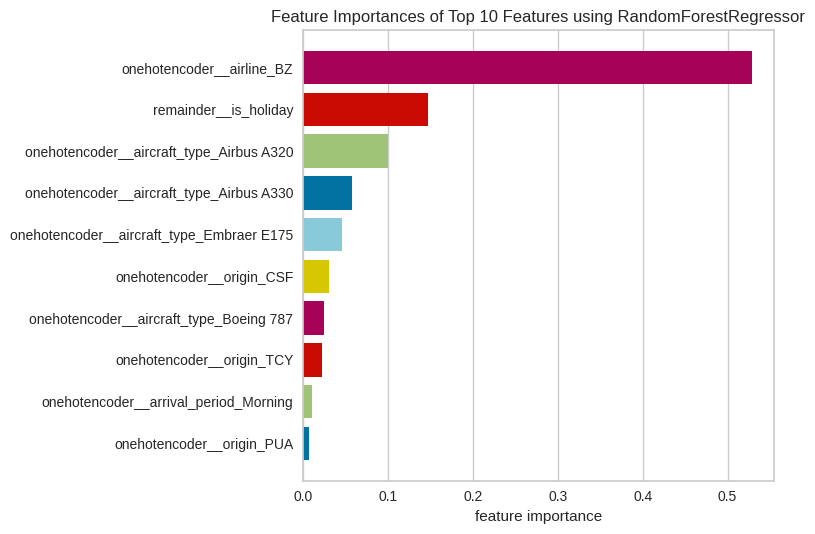

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [85]:
viz = FeatureImportances(model_rf2, relative=False, topn=10)
viz.fit(X2_train, y2_train)
viz.show()


In [86]:
importances2 = model_rf2.feature_importances_
feature_importances2 = pd.DataFrame({'feature': X2_train.columns, 'importance': importances2})
feature_importances2 = feature_importances2.sort_values('importance', ascending=False)
feature_importances2

,feature,importance
0,onehotencoder__airline_BZ,0.528294
30,remainder__is_holiday,0.147747
3,onehotencoder__aircraft_type_Airbus A320,0.100559
4,onehotencoder__aircraft_type_Airbus A330,0.058188
8,onehotencoder__aircraft_type_Embraer E175,0.045606
11,onehotencoder__origin_CSF,0.030847
7,onehotencoder__aircraft_type_Boeing 787,0.024848
16,onehotencoder__origin_TCY,0.021854
28,onehotencoder__arrival_period_Morning,0.010679
15,onehotencoder__origin_PUA,0.007324


In [87]:
results_df = pd.DataFrame(index=['MAE', 'RMSE', 'r2'])

model2_selected_features = RandomForestRegressor(max_depth=5, random_state=42)

for count in [1, 5, 10, 15, 20, 20, 25, 30]:
  selected_features2 = feature_importances2['feature'].values[:count]

  X2_train_selected = X2_train[selected_features2]
  X2_test_selected = X2_test[selected_features2]

  model2_selected_features.fit(X2_train_selected, y2_train)
  y2_pred_selected = model2_selected_features.predict(X2_test_selected)
  metricas = calcular_metricas_regressao(y2_test, y2_pred_selected)
  results_df[f'top_{count}'] = list(metricas.values())

results_df


,top_1,top_5,top_10,top_15,top_20,top_25,top_30
MAE,18.8639,15.1651,13.8358,13.7352,13.7189,13.7183,13.7185
RMSE,14.9854,12.0714,11.0575,11.0215,11.0078,11.0067,11.0071
r2,0.3402,0.5736,0.6451,0.6502,0.6510,0.6511,0.6511


In [88]:
results_df = pd.DataFrame(index=['MAE', 'RMSE', 'r2'])

model2_selected_features = RandomForestRegressor(max_depth=5, random_state=42)

for count in range(10,20):
  selected_features2 = feature_importances2['feature'].values[:count]

  X2_train_selected = X2_train[selected_features2]
  X2_test_selected = X2_test[selected_features2]

  model2_selected_features.fit(X2_train_selected, y2_train)
  y2_pred_selected = model2_selected_features.predict(X2_test_selected)
  metricas = calcular_metricas_regressao(y2_test, y2_pred_selected)
  results_df[f'top_{count}'] = list(metricas.values())

results_df

,top_10,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19
MAE,13.8358,13.7646,13.7583,13.7583,13.7583,13.7352,13.7301,13.7284,13.7242,13.7225
RMSE,11.0575,11.0242,11.0198,11.0198,11.0197,11.0215,11.0202,11.0145,11.0105,11.0093
r2,0.6451,0.6487,0.6490,0.6490,0.6490,0.6502,0.6505,0.6506,0.6508,0.6509


In [89]:
selected_features2 = feature_importances2['feature'].values[:12]

X_selected_features2 = dados_enc_df[selected_features2]


X2_train, X2_test, y2_train, y2_test = train_test_split(X_selected_features2, y2, random_state=42)
print(X2_train.shape)
print(y2_train.shape)


(53381, 12)
(53381,)


In [90]:
#from sklearn.model_selection import GridSearchCV

cv2 = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid2 = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=cv2, scoring='r2')
model_grid2.fit(X2_train, y2_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [91]:
model_grid2.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [92]:
y2_pred_model_grid = model_grid2.predict(X2_test)

metricas_model_grid2 = calcular_metricas_regressao(y2_test, y2_pred_model_grid)
metricas_model_grid2

{'Raiz do Erro Quadrático Médio': 13.5099,
 'Erro Absoluto Médio': 10.8636,
 'R2 Score': 0.6616}

In [93]:
results_df['model_grid2'] = list(metricas_model_grid2.values())
results_df

,top_10,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,model_grid2
MAE,13.8358,13.7646,13.7583,13.7583,13.7583,13.7352,13.7301,13.7284,13.7242,13.7225,13.5099
RMSE,11.0575,11.0242,11.0198,11.0198,11.0197,11.0215,11.0202,11.0145,11.0105,11.0093,10.8636
r2,0.6451,0.6487,0.6490,0.6490,0.6490,0.6502,0.6505,0.6506,0.6508,0.6509,0.6616


# Usando TensorFlow

In [94]:
y2_train

,remainder__delay
44005,21.176514
41804,52.838836
36254,30.824867
34419,37.411762
46078,7.516603
...,...
37194,-19.569948
6265,13.101842
54886,-6.713553
860,18.184185


In [95]:
# Será necessário normalizar o resultado
normalizacao = MinMaxScaler()
X2_train = normalizacao.fit_transform(X_train)
X2_test = normalizacao.transform(X_test)
normalizacao2 = MinMaxScaler()
y2_test = normalizacao2.fit_transform(np.array(y_test).reshape(-1, 1))
y2_train = normalizacao2.fit_transform(np.array(y_train).reshape(-1, 1))
pd.DataFrame(X2_train, columns=one_hot.get_feature_names_out()[:12])

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,onehotencoder__origin_CNU,onehotencoder__origin_CSF
0,1.0,0.0,1.0,0.0,0.0,0.185612,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.747792,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.124280,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.140812,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.705790,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53376,1.0,0.0,0.0,1.0,0.0,0.384159,0.0,1.0,0.0,0.0,0.0,0.0
53377,0.0,0.0,0.0,0.0,0.0,0.812022,1.0,0.0,0.0,0.0,0.0,0.0
53378,1.0,0.0,0.0,1.0,0.0,0.786364,0.0,0.0,0.0,0.0,0.0,1.0
53379,0.0,0.0,0.0,1.0,0.0,0.834835,0.0,0.0,0.0,0.0,1.0,0.0


In [96]:
y2_train

array([[0.37193811],
       [0.56458357],
       [0.43064232],
       ...,
       [0.20224448],
       [0.35373166],
       [0.32705796]])

In [97]:
X2_train


array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

def r2_score(y_true, y_pred):
    ss_total = K.sum(K.square(y_true - K.mean(y_true)))
    ss_residual = K.sum(K.square(y_true - y_pred))
    return 1 - ss_residual / (ss_total + K.epsilon())


model_tf = Sequential([
    Dense(12, activation='relu', input_shape=(12,)),
    #Dense(24, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])
model_tf.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', r2_score])
model_tf.summary()
#model.fit(X_train, y_train, epochs=20, batch_size=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 325 (1.27 KB)

 Trainable params: 325 (1.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0107 - mae: 0.0807 - r2_score: 0.3138 - val_loss: 0.0071 - val_mae: 0.0665 - val_r2_score: 0.5402
Epoch 2/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.0070 - mae: 0.0672 - r2_score: 0.5190 - val_loss: 0.0070 - val_mae: 0.0670 - val_r2_score: 0.5446
Epoch 3/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.0070 - mae: 0.0669 - r2_score: 0.5264 - val_loss: 0.0071 - val_mae: 0.0677 - val_r2_score: 0.5309
Epoch 4/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.0071 - mae: 0.0675 - r2_score: 0.5319 - val_loss: 0.0071 - val_mae: 0.0671 - val_r2_score: 0.5417
Epoch 5/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.0070 - mae: 0.0670 - r2_score: 0.5307 - val_loss: 0.0070 - val_mae: 0.0663 - val_r2_score: 0.5461
Epoch 6/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0070 - mae: 0.0669 - r2_score: 0.5306 - val_loss: 0.0070 - val_mae: 0.0669 - val_r2_score: 0.5441
Epoch 7/10
4271/4271 ━

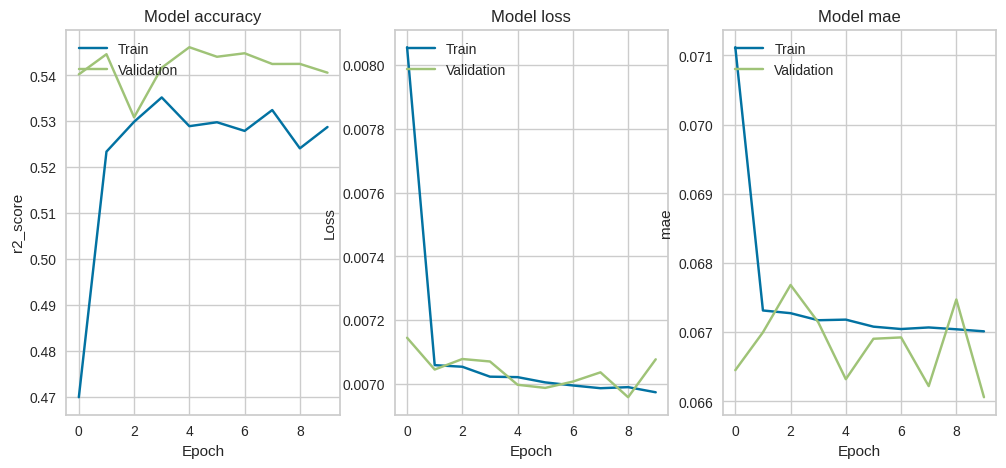

In [99]:
history = model_tf.fit(X2_train, y2_train, epochs=10, batch_size=10, validation_split=0.2)


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))


plt.subplot(1, 3, 1)
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])
plt.title('Model accuracy')
plt.ylabel('r2_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 3, 3)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [100]:
model_tf.evaluate(X2_test, y2_test)



557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0068 - mae: 0.0640 - r2_score: 0.6298


[0.0067093251273036, 0.06394268572330475, 0.6283396482467651]

In [101]:
nova_amostra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]

# Convert the list to a NumPy array and reshape it for the model
import numpy as np
nova_amostra_np = np.array([nova_amostra])

predicao = model_tf.predict(nova_amostra_np)
print("Resultado para o novo dado:", predicao)

# Assuming this is a regression model, we don't need the classification steps
# predicao = label_encoder.inverse_transform((predicao > 0.5).astype(int))
# print("Predição:", predicao)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Resultado para o novo dado: [[0.9995345]]


# TEXTO: Bagging e Boosting

Fonte: https://www.alura.com.br/artigos/machine-learning-tecnicas-bagging-boosting


### Relação entre variância e viés

A relação entre viés e variância em modelos de machine learning é uma parte fundamental da compreensão do desempenho e da generalização desses modelos. Esses conceitos estão relacionados à capacidade de um modelo se ajustar aos dados de treinamento e à sua capacidade de generalizar para dados não observados.

 -   Viés (Bias): O viés refere-se à tendência de um modelo fazer suposições simplificadas sobre os dados, o que pode levar a erros sistemáticos. Um modelo com alto viés tende a subestimar ou superestimar consistentemente os valores reais dos dados. Isso pode acontecer quando o modelo é muito simples para capturar a complexidade dos dados. Modelos de baixa complexidade, como regressão linear simples, geralmente têm alto viés.

 -   Variância: A variância está relacionada à sensibilidade de um modelo às variações nos dados de treinamento. Um modelo com alta variância se ajusta muito bem aos dados de treinamento, mas não generaliza bem para novos dados. Isso pode ocorrer quando o modelo é muito complexo e captura até mesmo o ruído presente nos dados de treinamento. Modelos de alta complexidade, como árvores de decisão profundas ou redes neurais complexas, tendem a ter alta variância.

A relação entre viés e variância pode ser visualizada através do conceito de "trade-off" entre eles:

 -   Baixo Viés e Alta Variância: Modelos com baixo viés e alta variância têm a capacidade de se ajustar muito bem aos dados de treinamento, mas eles tendem a se comportar mal em dados não vistos, devido à sua sensibilidade às variações. Isso resulta em overfitting, onde o modelo memoriza o ruído nos dados de treinamento.

  -  Alto Viés e Baixa Variância: Modelos com alto viés e baixa variância são mais simplificados e não se ajustam bem aos dados de treinamento. Eles geralmente não capturam a complexidade dos dados e, portanto, não generalizam bem. Isso resulta em underfitting, onde o modelo não consegue aprender os padrões presentes nos dados.

  -  Equilíbrio entre Viés e Variância: O objetivo é encontrar um equilíbrio entre viés e variância, resultando em um modelo que se ajuste adequadamente aos dados de treinamento e generalize bem para novos dados. Isso envolve escolher a complexidade apropriada do modelo e ajustar seus hiperparâmetros conforme necessário.

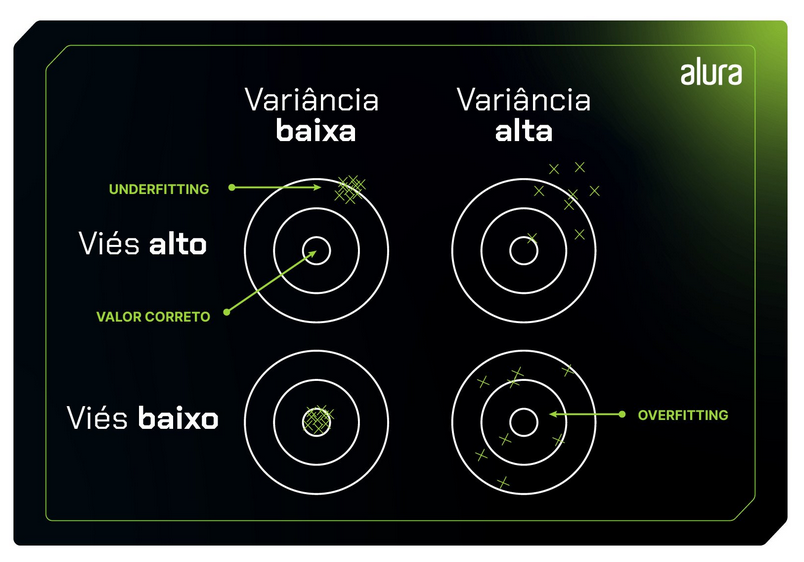

Métodos Ensemble

Um algoritmo que utiliza vários modelos em conjunto com o objetivo de obter um modelo final com melhores resultados é chamado de método Ensemble. O processo envolve a criação de um conjunto de modelos, que pode ser composto por diferentes algoritmos ou variações do mesmo algoritmo. Os modelos que são combinados através desse método são chamados modelos base. Geralmente, esses modelos obtêm resultados apenas um pouco melhores do que uma classificação aleatória.

Ao tomar decisões importantes, é útil considerar diferentes pontos de vista. Por exemplo, podemos pensar na predição do preço de imóveis. Nesse caso, precisamos estar atentos a várias características da propriedade (como tamanho, configuração, estado de conservação etc.), bem como para características do entorno destes imóveis, para ajudar a prever o preço adequadamente. Entretanto, confiar em apenas um modelo preditivo pode não ser a melhor decisão, pois ele pode não ser suficiente para estimar os preços dos imóveis.

Assim como as decisões embasadas tendem a ser mais sólidas, os métodos Ensemble também seguem essa abordagem. Nesse caso, utilizamos as predições do preço de imóveis de vários modelos preditivos para obter uma predição final mais precisa. Com isso, a ideia dos métodos Ensemble é combinar vários modelos base para obter um modelo final aprimorado. Dois métodos populares são o Bagging e o Boosting, cada um com sua abordagem única para a combinação de modelos e aprimoramento do desempenho.

### Bagging

Trata-se de uma técnica de Ensemble que visa reduzir a variância e, assim, evitar o overfitting. No Bagging, várias instâncias do mesmo algoritmo são treinadas paralelamente em subconjuntos aleatórios e independentes dos dados de treinamento. Esses subconjuntos são criados por meio de amostragem com reposição, o que significa que um mesmo dado pode aparecer em múltiplos subconjuntos, como pode ser analisado na sequência.

Os resultados desses modelos base, como se pode analisar na imagem acima, são combinados por média (para problemas de regressão) ou por votação (para problemas de classificação), resultando em uma previsão final mais estável e geralmente mais precisa.

Um exemplo de algoritmo que faz uso da técnica de Bagging é o RandomForest, que utiliza conjuntos de árvores de decisão. Quando várias árvores se juntam, formam uma floresta (forest). As árvores que compõem uma floresta podem ser rasas (com poucos níveis) ou profundas (com muitos níveis). A abordagem do RandomForest é um método de Bagging em que árvores profundas, ajustadas em amostras com reposição, são combinadas para produzir uma saída com menor variância. Por esse motivo, esse algoritmo é conhecido por sua capacidade de lidar com o overfitting.

Como exemplo prático, vamos supor que estamos trabalhando em um problema de classificação de imagens para distinguir entre gatos e cachorros. Com o RandomForestClassifier, podemos construir diversas árvores de decisão independentes, cada uma delas examinando diferentes características dos pacientes. Posteriormente, essas árvores individuais se unem, combinando suas decisões através de votação, para gerar uma classificação final mais robusta e precisa.

Boosting

Trata-se dos modelos base que são treinados de forma sequencial, em que cada modelo se concentra em corrigir o modelo anterior. Isso significa que os modelos seguintes dão mais atenção aos dados que foram classificados incorretamente nas etapas anteriores.

À medida que as iterações acontecem, o modelo Ensemble aprimora a sua capacidade de lidar melhor com os padrões complexos nos dados, resultando em uma melhoria contínua no seu desempenho. Assim como um atleta que treina incansavelmente para se tornar cada vez mais habilidoso, ele aprimora sua performance passo a passo.

No caso do Boosting, temos como exemplo o AdaBoost (Adaptive Boosting), que é um algoritmo que atribui pesos diferentes aos dados durante o treinamento. Ele começa treinando um modelo fraco e, em seguida, atribui pesos maiores aos exemplos classificados incorretamente pelo modelo fraco anterior. Os modelos seguintes são treinados para focar nos erros cometidos pelos modelos anteriores. O AdaBoost é capaz de melhorar o desempenho de modelos fracos, criando um modelo final mais forte e preciso.

### Principais diferenças

Para resumir as principais diferenças entre os métodos Bagging e Boosting, podemos conferir a tabela abaixo:


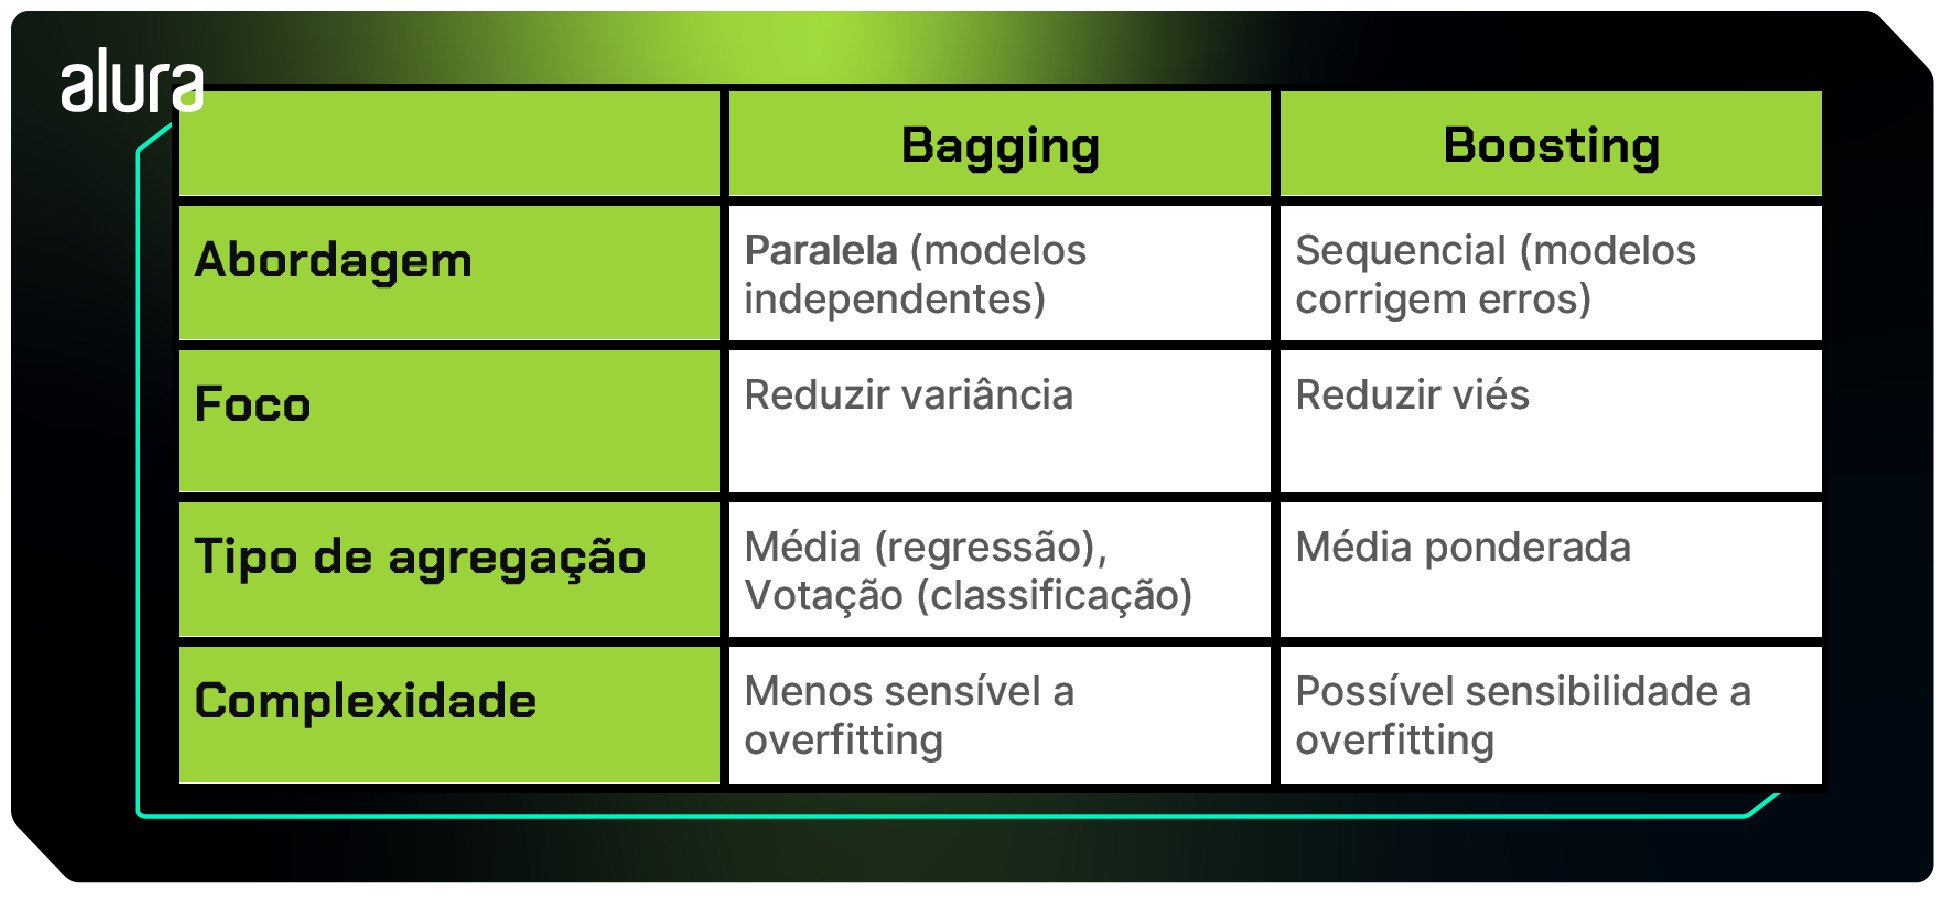

Como podemos perceber, enquanto o Bagging foca na redução da variância, construindo modelos independentes que são agregados via média ou votação, o Boosting se concentra na mitigação do viés, sequencialmente ajustando modelos para corrigir erros anteriores com uma média ponderada. Além disso, o Bagging tende a ser menos sensível ao overfitting, enquanto o Boosting pode apresentar maior sensibilidade.

## Conclusão

Os métodos Ensemble constituem uma abordagem fundamental para aprimorar a performance dos modelos, pois combinam múltiplos modelos base em um único modelo final. Neste artigo, exploramos como a relação entre o viés e a variância nos modelos, também chamada de “trade-off”, está relacionada com a capacidade de um modelo se ajustar à complexidade dos dados de treinamento e a lidar com dados novos. A partir disso, conhecemos dois métodos ensemble que buscam o equilíbrio nessa relação: o Bagging e o Boosting. Enquanto o Bagging opera em paralelo, visando mitigar a variância por meio da média ou votação das previsões, o Boosting adota uma abordagem sequencial, buscando a redução do viés por meio de iterações corretivas. A escolha entre esses métodos deve ser guiada pela natureza dos dados e objetivos específicos do modelo.

# Testando ADABoosting

In [106]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor # Changed to AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor # Changed to DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Import regression metrics

base_model = DecisionTreeRegressor(max_depth=5, random_state=42) # Changed to DecisionTreeRegressor
# Criar o modelo AdaBoost com o modelo base
model = AdaBoostRegressor(base_model, n_estimators=50, random_state=42) # Changed to AdaBoostRegressor
# Treinar o modelo
model.fit(X2_train, y2_train)
# Fazer previsões
predictions = model.predict(X2_test)

# Evaluate the model using regression metrics
rmse, mae, r2 = calcular_metricas_regressao2(y2_test, predictions)
print_metricas_regressao(rmse, mae, r2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Raiz do Erro Quadrático Médio - RMSE: 0.0852
Erro Absoluto Médio - MAE: 0.0711
R2 Score : 0.6260
